## В этом Notebook:
1. Продолжим изучать Seaborn
2. Посмотрим как рисовать двумерные рисунки

In [2]:
# Выполни прежде чем проходить Notebook
from google.colab import drive
import os
drive.mount ('/content/gdrive', force_remount=True)

%run /content/gdrive/MyDrive/03_Data_Visualization/0_package_installation.ipynb
# Перезагрузка ядра
os.kill(os.getpid(), 9)

Mounted at /content/gdrive


## Двумерный анализ с помощью Seaborn
Импортируем необходимые библиотеки и загрузим набор данных penguins.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
penguins = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/penguins.csv')

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.dropna(inplace = True)

## 1. Категориальные переменные
Если вы хотите визуализировать данные с категориальными переменными, вы можете выбрать один из двух подходов к построению графиков, как мы уже видели в предыдущем Notebook:

a) `catplot()` функция построения графиков
    - это интерфейс рисования графиков, который позволяет строить графики категориальных переменных
    - при вызове этой функции по умолчанию будет нарисован `stripplot`

Важное замечание:
- данные, которые вы хотите визуализировать, должны передаваться в виде DataFrame
- категориальные и числовые переменные должны передаваться в виде строк параметрам `x` и `y` следующим образом:
   ```sns.catplot(data = dataset, x = 'categorical_variable', y = 'numerical_variable')```
- приведенный ниже код не работает:
     ```sns.catplot(x = data['categorical_variable'], y = data['numerical_variable'])```

Функция `catplot()` предоставляет нам доступ к другим функциям построения графиков, которые можно выбрать, передав соответствующий вид графика в параметре **kind**:
- "box", "swarm", "strip", "violin", "barplot" и т.д.

б) функции рисования на уровне осей x, y
- `sns.boxplot()`
- `sns.swarmplot()`
- `sns.stripplot()`
- `sns.violinplot()`
- `sns.countplot()`
- `sns.barplot()` и т.д.

## 1.1 Категориальная и числовая переменная
Как распределение числовой переменной варьируется по разным категориям. Для этого можно использовать функции построения графиков, такие как sns.boxplot(), sns.violinplot(), sns.boxenplot().


### 1.1.1 Ящик с усами
Внутри функции для создания боксплота мы указываем набор данных и имена переменных. Категориальная переменная **"species"** будет отображаться на оси x, а соответствующие значения **"body_mass_g"** - на оси y.

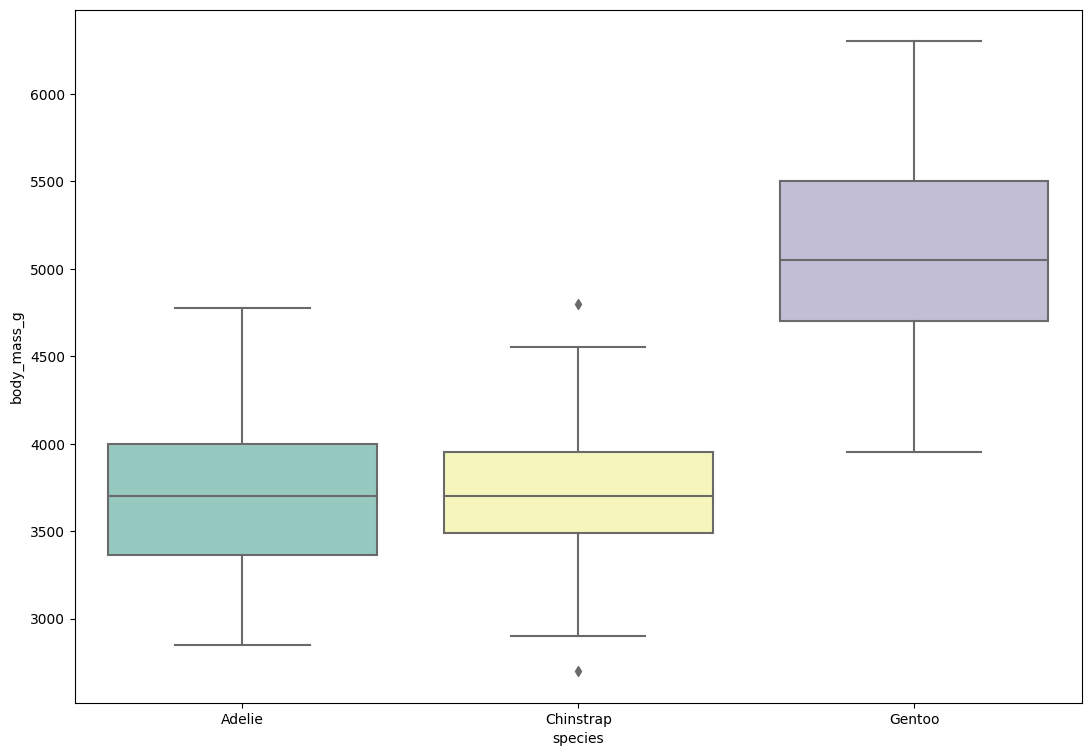

In [ ]:
plt.figure(figsize = (13,9))
sns.boxplot(data = penguins,
            x = 'species',
            y = 'body_mass_g',
            palette = 'Set3');

Визуализация распределения показывает нам интересные различия и сходства между видами пингвинов. Большинство пингвинов Adelie и Chinstrap весят примерно до 4000 граммов, хотя вес пингвинов Chinstrap меньше, чем пингвинов Adelie. У этих двух видов также одинаковое медианное значение - 3700 грамм (мы также проверили медианные значения в ячейке кода ниже). В случае с пингвинами Chinstrap присутствуют выбросы, которые могут указывать на то, что некоторые пингвины весят меньше или больше по сравнению с остальными наблюдениями. Пингвины Gentoo в целом тяжелее, в то время как подавляющее большинство пингвинов имеют вес около 4700-5500 грамм. у этого вида самый высокий диапазон зарегистрированных значений.

In [ ]:
print('Adelie body mass-median value: ', penguins[penguins.species == 'Adelie'].body_mass_g.median(),
      '\n'
      'Chinstrap body mass-median value: ', penguins[penguins.species == 'Chinstrap'].body_mass_g.median())

Adelie body mass-median value:  3700.0 
Chinstrap body mass-median value:  3700.0


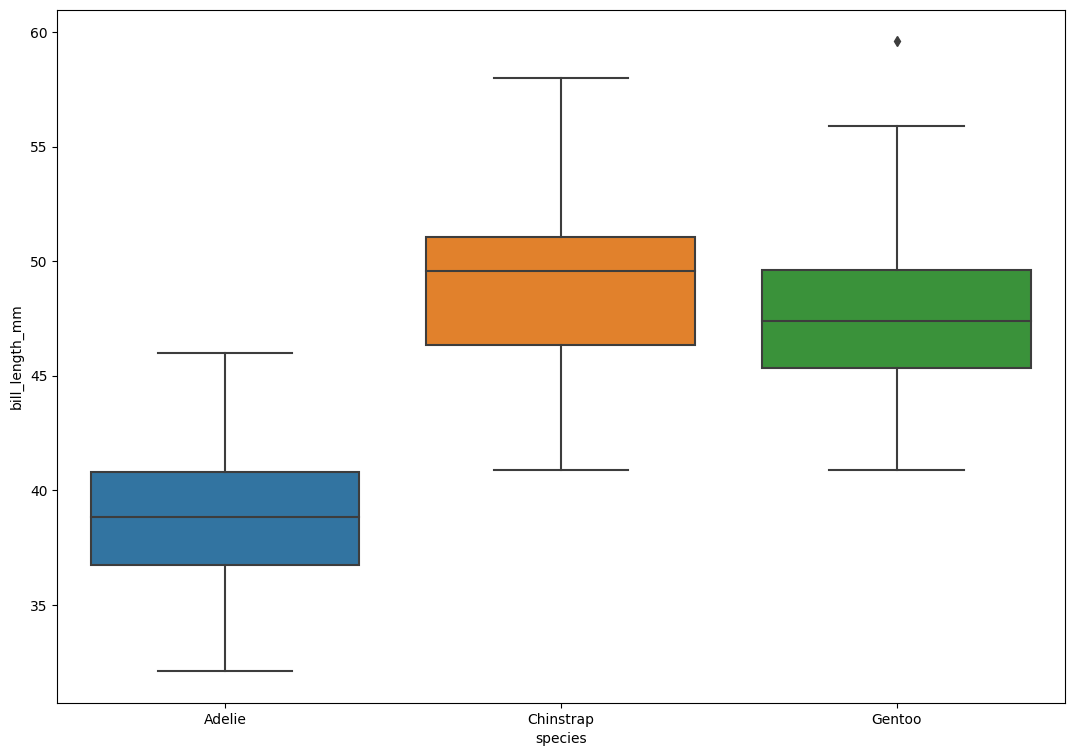

In [ ]:
plt.figure(figsize = (13,9))
sns.boxplot(data = penguins,
            x = 'species',
            y = 'bill_length_mm');

Из графиков видно, что для вида Adelie характерна наименьшая длина клюва, в то время как у большинства пингвинов длина клюва составляет около 37-41 мм. У видов Chinstrap и Gentoo длина клюва составляет около 41 мм. Если не принимать во внимание выброс вида Gentoo, то этот вид имеет более короткий клюв по сравнению с пингвинами Chinstrap.

### Задача 1.1
1. Создайте ящик с усами используя колонку "bill_depth_mm" в зависимости от вида пингвина
2. Установите размер фигуры: (13,9)
3. Установите заголовок графика: "Распределение глубины счета в зависимости от вида"

In [ ]:
# Начните писать свой код ниже:


Что вы можете сказать об этих трех видах в отношении глубины клюва? Как различается распределение? Как насчет диапазона значений? Какой вид имеет наименьший диапазон глубины?

### 1.1.2 Swarmplot
Мы также можем более подробно изучить три острова, где живут пингвины. Поскольку наш набор данных состоит из не слишком большого количества наблюдений, точки данных будут хорошо прорисованы.

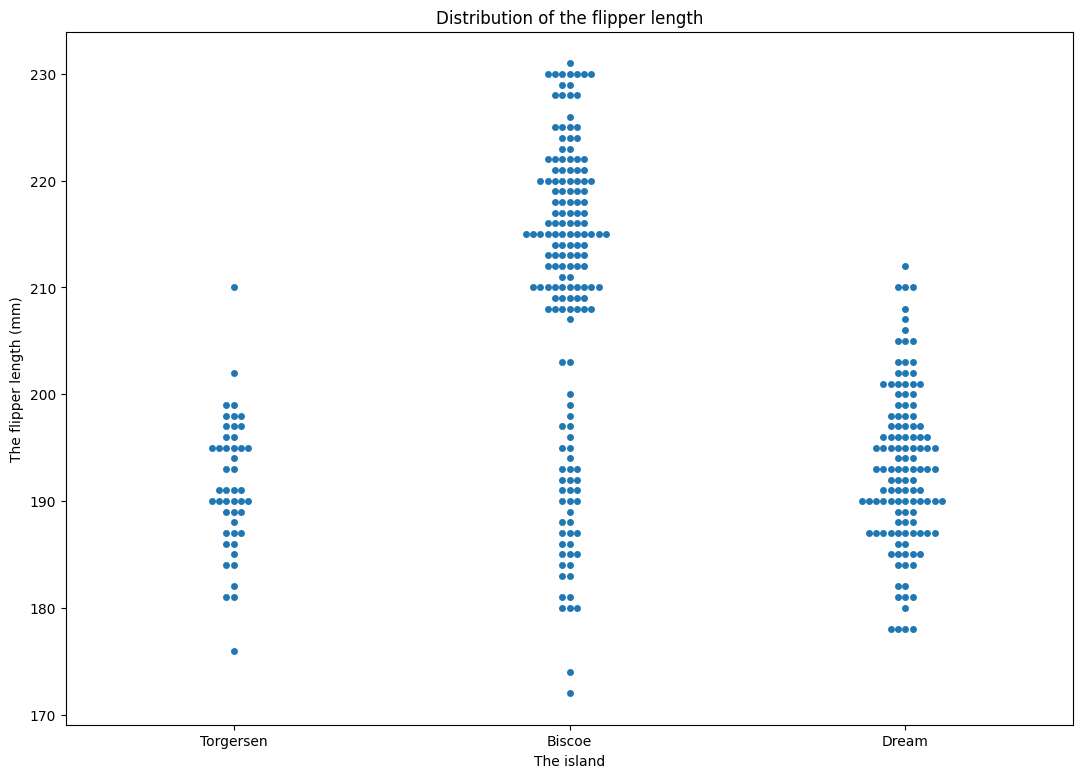

In [ ]:
plt.figure(figsize = (13,9))
ax = sns.swarmplot(data = penguins,
              x = 'island',
              y = 'flipper_length_mm')
ax.set(title = 'Distribution of the flipper length', # Доступ к объекту Axes и установка заголовка с помощью .set()
       xlabel = 'The island',
       ylabel = 'The flipper length (mm)');

Теперь мы видим распределение длины ласт пингвинов на трех островах, но этот график не дает нам никакой конкретной и полезной информации. Мы можем сказать только, что, например, на острове Biscoe есть пингвины либо с очень короткими ластами, либо подавляющее большинство пингвинов имеют длинные ласты около 215 миллиметров.

Давайте изучим, какие виды действительно присутствуют на тех или иных островах.

In [ ]:
penguins.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: species, dtype: int64

Интересно, что виды Adelie обитают на всех трех островах. Пингвины Gentoo обитают только на острове Biscoe, а родиной пингвинов Chinstrap является остров Dream. Давайте отфильтруем набор данных только для пингвинов Gentoo и Chinstrap.

Вы можете создать подмножество DataFrame с определенными строками на основе условия, используя индексирование, как в этом примере:
```subset = data['weight'] == 85```

Эта операция проверяет, содержит ли строка значение 85, и возвращает только те строки, в которых это условие выполнено.

Другим вариантом является использование запроса, который мы применим к DataFrame. Мы указываем, что хотим отфильтровать только те строки, где в качестве видов присутствуют пингвины Gentoo и Chinstrap. Поскольку мы фильтруем более чем по одному условию, эти виды должны быть переданы в виде списка. Мы используем ключевое слово **in**, которое проверяет, присутствует ли вид в списке.

Выберите подход, который больше всего нравится вам. Я включил оба подхода для сравнения синтаксиса кода.

In [ ]:
penguins_filter = penguins.query('species in ["Gentoo","Chinstrap"]')

In [ ]:
penguins_fil = penguins[penguins['species'].isin(["Gentoo","Chinstrap"])]

In [ ]:
penguins_filter

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Задача 1.2
1. Создайте swarmplot, используя созданное подмножество **penguins_filter**
2. Установите размер фигуры: (13,9)
3. Визуализируйте длины ласт на основе видов Chinstrap и Gentoo
4. Установите заголовок: "Распределение видов Chinstrap и Gentoo" с помощью **plt.title()**

In [ ]:
# Напишите свой код ниже


### 1.1.3 Stripplot
Поскольку вы уже научились создавать Stripplot, попробуйте выполнить следующее упражнение по визуализации распределения длины ласт вида Adelie в зависимости от категории пола.

In [ ]:
adelie_filter = penguins.query('species == "Adelie"')

In [ ]:
adelie_filter

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


### Задача 1.3
1. Визуализируйте распределение длины ласт пингивинов Адели с помощью swarmplot на основе колонки пола.
2. Установите размер графика: (13,9)
3. Сохраните вывод графика stripplot в переменную **ax**
4. С помощью **ax.set()** установите следующее
    - Длина ласт в зависимости от пола
    - x-axis label: 'Пол'
    - y-axis label: 'Длина ласт (мм)'

In [ ]:
# Напишите свой код ниже


## 1.1.4 Violinplot
Violinplot - некоторая комбинация boxplot и оценки плотности распределения. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов.

Категории можно хорошо сравнивать с помощью Violinplot, который показывает статистику из графика ящика с усами и форму распределения, полученную из графика плотности. График Violinplot является хорошим выбором для построения графика распределения, когда визуализация большого количества наблюдений недостаточна из-за пересечения точек данных.

```python:
sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
```
- x, y, hue — одномерные данные или имена переменных из data;
- data — данные;
- gridsize — размер сетки для отрисовки ядерной оценки плотности;
- orient: "v" | "h" — ориентация (вертикальная или горизонтальая);
- color и palette — задают цвет.

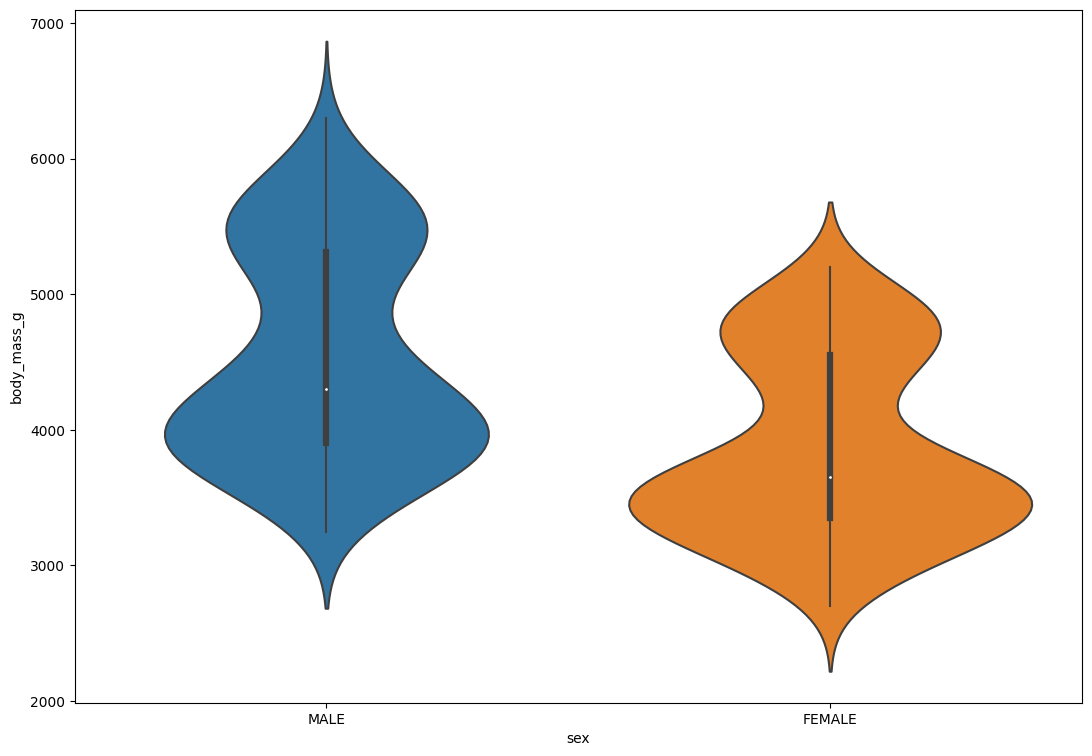

In [ ]:
plt.figure(figsize = (13,9))
sns.violinplot(data = penguins,
               x = 'sex',
               y = 'body_mass_g');

Violinplot состоит из ящиков с усами, которые отображаются в центре. Толстая черная полоса представляет большинство значений (IQR), а белая точка - медианное значение. Тонкие черные линии представляют остальные точки данных. Форма распределения отображается на каждой стороне. Интерпретация violinplot аналогична swarmplot. Более широкие части показывают более высокую частоту наблюдений, в то время как тонкие части обозначают меньшее количество наблюдений. Можно заметить, что большинство самцов пингвинов имеют вес около 4000 граммов и в целом тяжелее самок.

Для указания других параметров см. [документацию](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

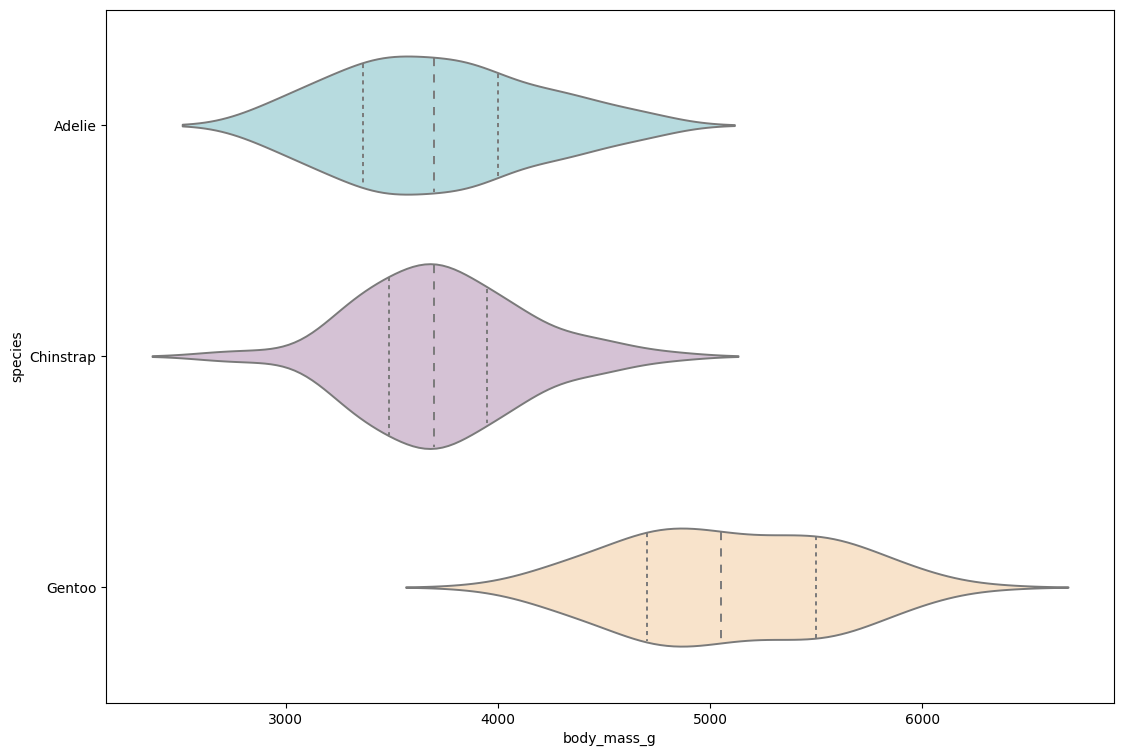

In [ ]:
# График vioilinplot переменной 'body_mass_g' в зависимости от вида
color = {'Adelie':'powderblue','Chinstrap':'thistle','Gentoo':'bisque'}
plt.figure(figsize = (13,9))
ax = sns.violinplot(data = penguins,
                    x = 'body_mass_g',
                    y = 'species',
                    inner = 'quartile',
                    linewidth = 1.4,
                    palette = color);

### 1.1.5 Displot
Мы также можем сравнить разброс значений с помощью гистограммы, задав несколько параметров.

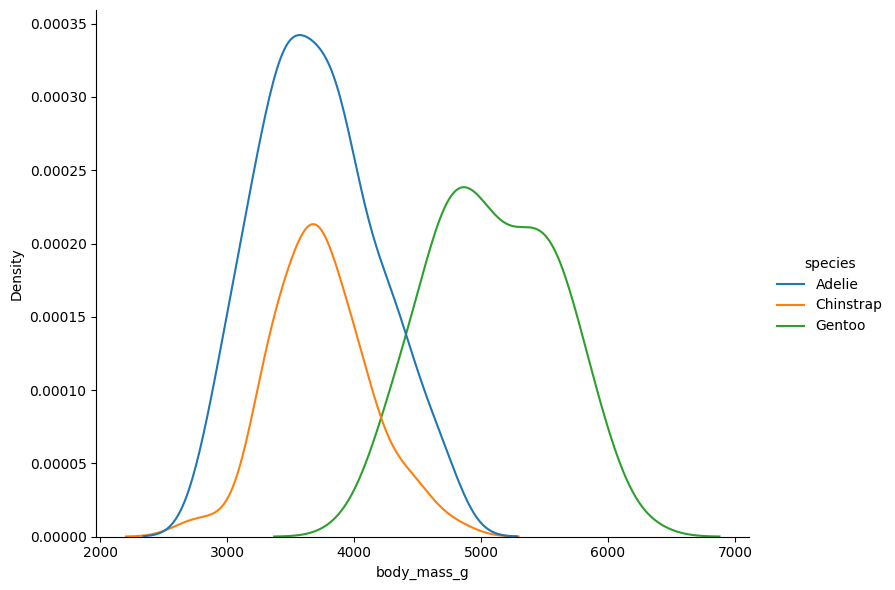

In [ ]:
sns.displot(data = penguins,
            x='body_mass_g',
            hue = 'species',
            kind = 'kde',
            height = 6,
            aspect = 1.3);

## 1.2 Категориальная переменная против категориальной переменной
С помощью **countplot** диаграммы мы можем подсчитать количество наблюдений в каждой категории, а затем сравнить, как эти значения различаются по категориям.

Давайте визуализируем, сколько самок и самцов пингвинов имеется у каждого вида.

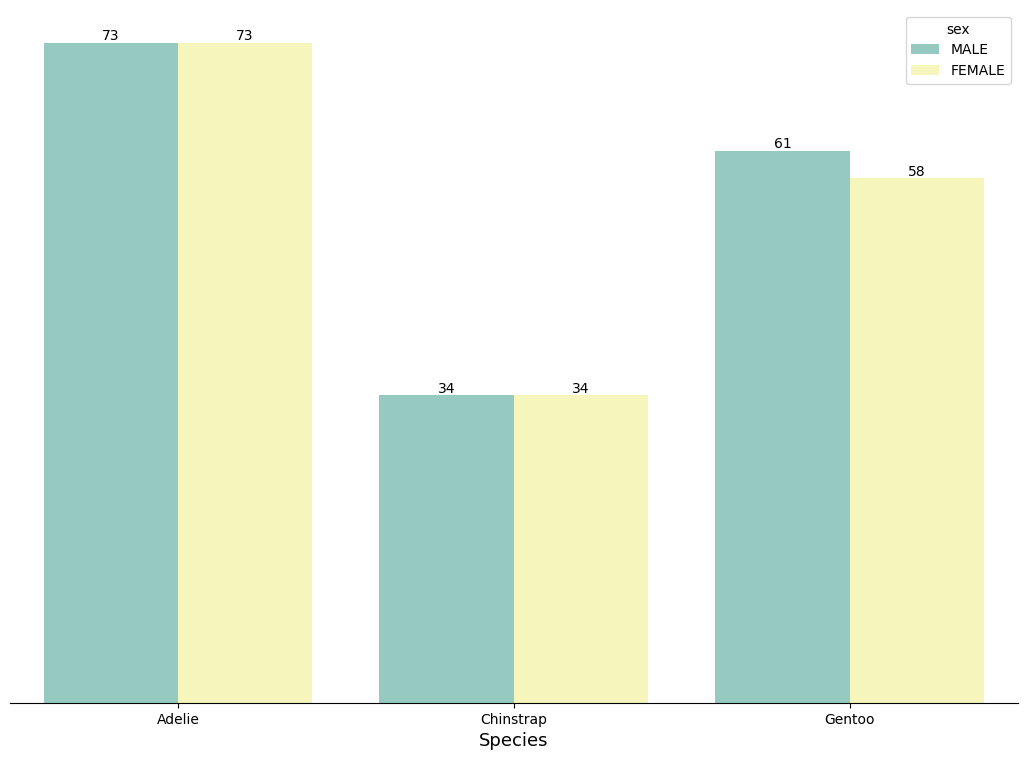

In [ ]:
# График количества самцов и самок пингвинов в зависимости от вида.
plt.figure(figsize = (13,9))
bars = sns.countplot(data = penguins, x = 'species', hue = 'sex', palette = 'Set3')

for b in bars.patches:
    bars.annotate('{:.0f}'.format(b.get_height()),  # Показывает подсчет и форматирование строк без десятичного знака
                 (b.get_x() + 0.2, b.get_height()), # Кортеж координат с добавлением некоторого плавающего значения для его центрирования
                                                    # и получение высоты столбика - для изменения расположения чисел
                                                    # вычесть некоторое число из b.get_height(), чтобы увидеть изменение
                  ha='center',                      # Настройка горизонтального выравнивания текста
                  va='bottom',                      # Настройка вертикального выравнивания текста
                  color= 'black',
                  fontsize = 10)
sns.despine(top = True, left = True)
bars.set(ylabel = '', yticks = [])                  # Удаление разметки на оси y
bars.set_xlabel('Species', fontsize = 13);

 ## 2. Числовая переменная против числовой переменной
 В ходе двумерного анализа двух числовых переменных мы пытаемся определить любую связь между ними и то, как эти переменные соотносятся друг с другом.


### 2.1 Relplot
Результатом этой функции является объект **FacetGrid**, который позволяет расширить существующий график несколькими способами, например, добавить еще один рисунок или добавить подмножество данных для визуального отображения различных категорий. Эти возможности будут рассмотрены в последнем Notebook о многомерном анализе.

Также можно выбрать метод визуализации статистической зависимости с помощью параметров:
- `kind = 'scatter'` - по умолчанию
- `kind = 'line`

Сейчас давайте сосредоточимся на создании графика зависимостей по умолчанию, сравнивающего сразу две числовые переменные. Мы указываем входной набор данных в параметре **data** и присваиваем числовым переменным **x** и **y** как строковое значение.

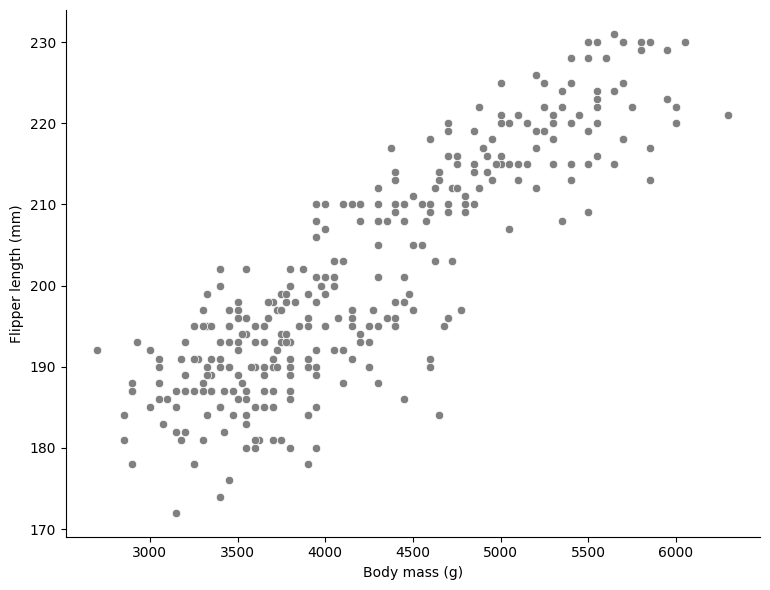

In [ ]:
rel = sns.relplot(data = penguins,
                  x = 'body_mass_g',
                  y = 'flipper_length_mm',
                  color = 'grey',
                  height = 6,
                  aspect = 1.3)
rel.set(xlabel = 'Body mass (g)',
        ylabel = 'Flipper length (mm)');

На приведенном выше графике показана зависимость между массой тела пингвина и длиной ласт. Видно, что эти две характеристики сильно связаны друг с другом. Четкая закономерность показывает, что с увеличением массы тела увеличивается длина ласт.

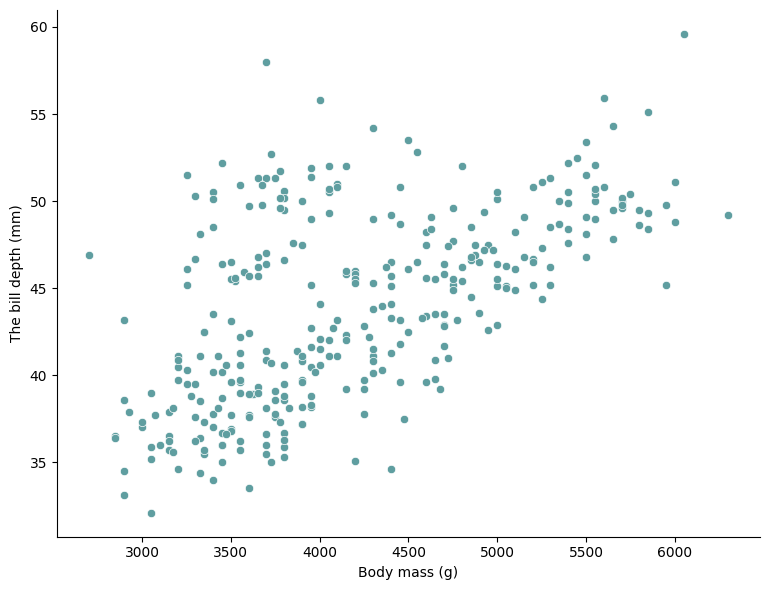

In [ ]:
rel = sns.relplot(data = penguins,
                  x = 'body_mass_g',
                  y = 'bill_length_mm',
                  color = 'cadetblue',
                  height = 6,
                  aspect = 1.3)
rel.set(xlabel = 'Body mass (g)',
        ylabel = 'The bill depth (mm)');

Опять же, мы можем наблюдать некую взаимосвязь между массой тела и глубиной клюва. Можно заметить, что пингвины с массой тела около 3500 грамм имеют либо короткую (примерно 35-40 мм), либо длинную (более 45 мм) глубину клюва. После веса около 4500 граммов связь становится несколько сильнее, и с увеличением массы тела длина клюва увеличивается. Это тот случай, когда нам необходимо более пристально взглянуть на взаимосвязь, применив какую-либо визуальную семантику, чтобы получить больше информации из данных.

### Задача 2.4
1. Создайте **relplot** для визуализации взаимосвязи между переменными 'bill_length_mm' и 'bill_depth_mm'
2. Установите параметры: height = 6, aspect = 1.3
3. Установите название для оси x: Длина ласт (мм)
4. Для оси y: Глубина ласт (мм)

In [ ]:
# Напишите свой код ниже


Что вы можете сказать об этой взаимосвязи? Связана ли длина клюва с глубиной клюва? Есть ли какие-то признаки сильной связи или вы почти не видите никаких закономерностей?

### 2.2 Scatterplot
Другой вариант создания графика зависимостей - использование функции **scaterplot()** на уровне осей.

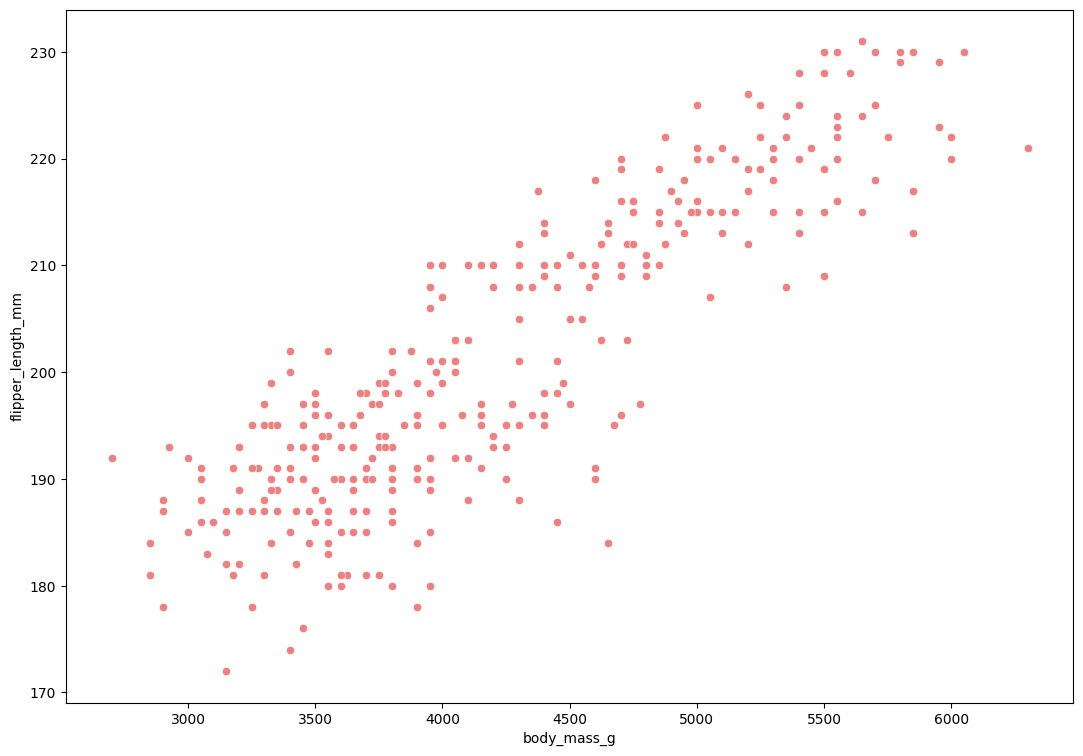

In [ ]:
# Взаимосвязь между массой тела (грамм) и длиной ласт (мм)
plt.figure(figsize = (13,9))
sns.scatterplot(data = penguins,
                x = 'body_mass_g',
                y = 'flipper_length_mm',
                color = 'lightcoral');

Мы видим сильную положительную связь между массой тела и длиной ласт.

## 2.3 Визуализация тенденций
### 2.3.1 Regplot
Функция **regplot()** на уровне осей создает диаграмму рассеяния и линию наилучшего соответствия с 95% доверительным интервалом по умолчанию, который рисуется с помощью полупрозрачных полос вокруг линии. Похожая функция построения графиков - **lmplot()**, которая использует **regplot** и объект FacetGrid, чтобы вы могли сравнить несколько категорий на графике.

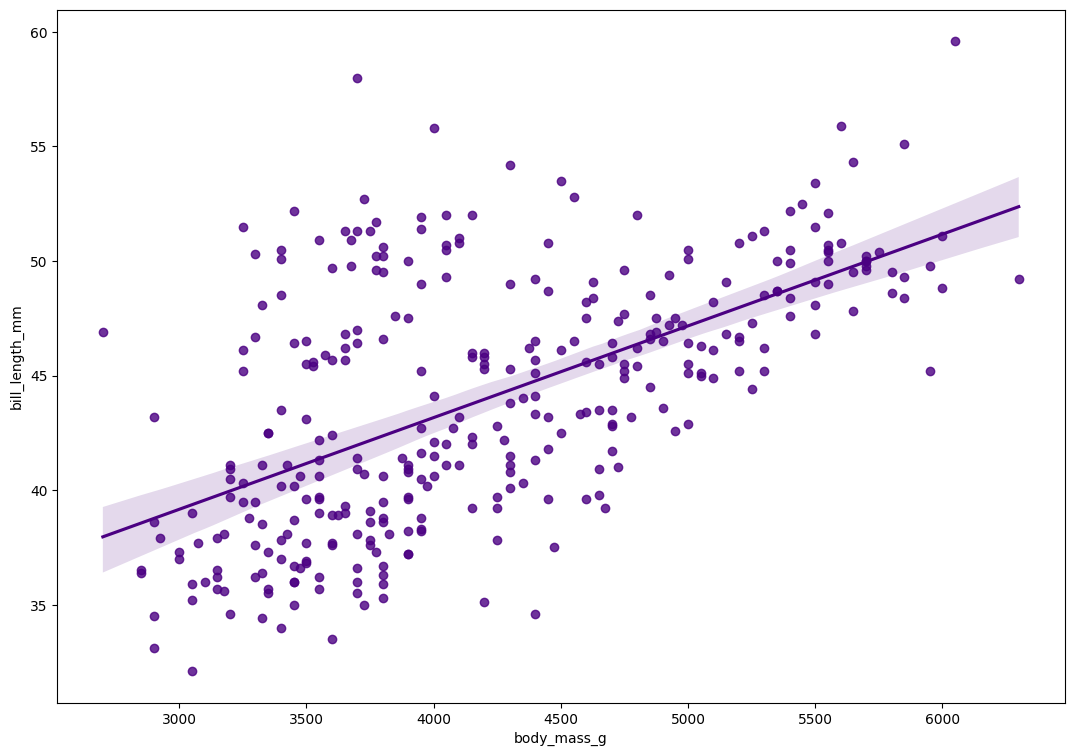

In [ ]:
# Регрессия переменных 'body_mass' и 'flipper_length_mm'
plt.figure(figsize = (13,9))
sns.regplot(data = penguins,
            x = 'body_mass_g',
            y = 'bill_length_mm',
            color = 'indigo',
            ci = 99);           # Установка размера доверительного интервала для оценки

### 3. Тепловая карта
Часто мы хотим вычислить коэффициенты корреляции, чтобы увидеть силу и направление взаимосвязи. Это можно сделать с помощью функции **Pandas's corr()**, которая принимает входные данные и вычисляет парную корреляцию переменных.

Типы корреляции, которые могут быть указаны в качестве аргумента параметра метода:
- pearson
- kendall
- spearman

Корреляционная матрица может быть визуализирована с помощью тепловой карты, где коэффициенты корреляции представлены в виде цветов. Значения коэффициентов корреляции могут находиться в диапазоне от -1 (сильная отрицательная связь) до 1 (сильная положительная связь). Поскольку коэффициенты принимают либо высокие, либо низкие значения, нам следует выбрать определенную цветовую палитру.

```python:
sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```
- data — 2D-данные;
- vmin и vmax — минимальное и максимальное значения цветов;
- cmap — цветовая схема;
- robust — если не указаны vmin и vmax, то не используются выбросы при определении минимума и максимума;
- annot — в какие ячейки записывать данные;
- fmt — формат записи данных;
- linewidths — ширина линий между ячейками;
- linecolor — цвет линий между ячейками;
- cbar — рисовать ли colorbar.

In [ ]:
# Вычисление коэффициентов корреляции
corr = penguins.corr()

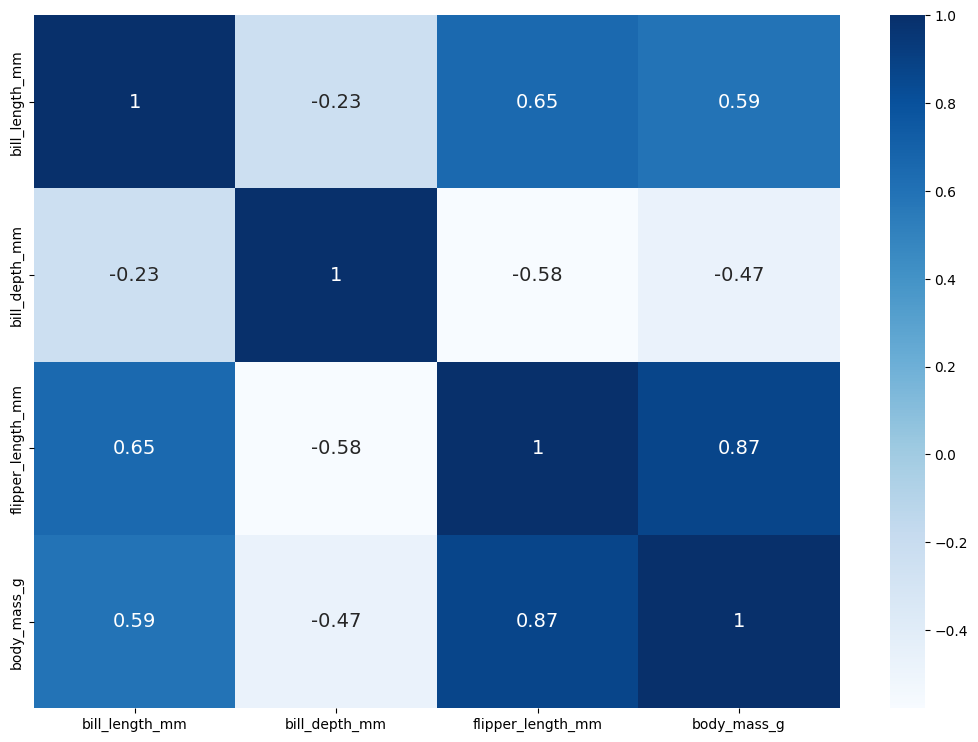

In [ ]:
# Тепловая карта набора данных пингвинов
fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr,
            annot = True,                 # Коэффициенты корреляции будут отображаться в каждой ячейке
            annot_kws = {'fontsize':14},  # Установка размера шрифта
            cmap = 'Blues');              # Установка цвета

## 4. Время для практики
Продолжим изучение набора данных "Банковский маркетинг", как и в предыдущем Notebook.


## 4.1 Загрузка данных, предварительная обработка

In [6]:
# Загрузка данные

data = pd.read_csv('/content/gdrive/MyDrive/03_Data_Visualization/Data/bank_data.csv',sep = ';')
# Переименование колонок
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [ ]:
#  Удаляем дублирующиеся строки
data.drop_duplicates(inplace = True)

In [ ]:
# Выберите все переменные, которые необходимо преобразовать в категориальные
to_category = ['job','marital_status','education','default_credit','house_loan',
               'loan','contact_type','month','day_of_week', 'previous_campaign_outcome']

In [ ]:
# Преобразуем их в тип данных "категория"

for col in to_category:
    data[col] = data[col].astype('category')

In [ ]:
# Создадим словарь с исходными значениями и соответствующими новыми значениями для дней недели
mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}

# Сопоставим новые значение со столбцом day_of_week
data.day_of_week = data.day_of_week.map(mapping_days)

In [ ]:
# Создадим словарь с исходными значениями и соответствующими новыми значениями для месяцев
mapping_months = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}
# Сопоставим новые значение со столбцом month
data.month = data.month.map(mapping_months)

In [ ]:
# Преобразуем секунды в минуты

data.contact_duration = data.contact_duration.apply(lambda x: x / 60)

In [ ]:
data

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,November,Friday,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,November,Friday,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,November,Friday,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,November,Friday,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Задача 4.5
1. Создайте объект **Figure** и установите размер графика (13,9)
2. Создайте тепловую карту данных с отображением коэффициентов корреляции на ней
3. Установите цветовую палитру: 'RdGy'

In [ ]:
# Начните писать свой код ниже:


### Задача 4.6
1. Создайте гистограмму 'contact_duration' на основе переменной 'target'
2. Установить параметр: multiple = 'stack'
3. Установите параметры: height = 7, aspect = 1.3

In [ ]:
# Начните писать свой код ниже:


### Задача 4.7
1. Создайте график ящик с усами по колонке 'age' основываясь на колонку 'target'
2. Установите размер графика: (13,9)

In [ ]:
# Начните писать свой код ниже:


### Задача 4.8
1. Создайте график countplot используя функцию catplot()
2. Визуализируйте колонку **target** на основе работы клиента
3. Установите параметры: height = 7, aspect = 1.3
4. Установите угол наклона наименование оси x на 50 градусов

In [ ]:
# Начните писать свой код ниже:


### Задача 4.9
1. Создайте график countplot по колонке 'marital_status' на основе колонки 'target', используя функцию catplot()
2. Установите параметры: height = 7, aspect = 1.3

In [ ]:
# Начните писать свой код ниже:
